In [1]:
#import basic libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Data Visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder,StandardScaler,LabelBinarizer,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

import re

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.multioutput import MultiOutputRegressor

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor



In [2]:
df_train=pd.read_excel(r'C:\Users\Doctor_Consultation_Fee_Train.xlsx')
df_test=pd.read_excel(r'C:\Users\Doctor_Consultation_Fee_Test.xlsx')

In [3]:
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [4]:
df_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [5]:
print('train_data:',df_train.shape)
print('\n')
print('test_data:',df_test.shape)

train_data: (5961, 7)


test_data: (1987, 6)


In [6]:
df_train.to_csv('doctor_consultation_fees_train.csv')
df_test.to_csv('doctor_consultation_fees_test.csv')

In [7]:
df=df_train.append(df_test,ignore_index=True)
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0
...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN
7946,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN


Combining both training and testing data into one dataset for preprocessing
and later dividing them during data training.

In [8]:
print(df_train.shape,df_test.shape,df.shape)

(5961, 7) (1987, 6) (7948, 7)


Observation: There is a column missing in test data, it s the target column
    whch is,Fees.
    

In [9]:
df.shape

(7948, 7)

In [10]:
df.columns


Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       7948 non-null   object 
 1   Experience          7948 non-null   object 
 2   Rating              3556 non-null   object 
 3   Place               7917 non-null   object 
 4   Profile             7948 non-null   object 
 5   Miscellaneous_Info  4494 non-null   object 
 6   Fees                5961 non-null   float64
dtypes: float64(1), object(6)
memory usage: 434.8+ KB


observation:
    1.In the above data only fees is float datatype.
    2.missing values are present in Rating,Place and Miscellaneous info.
    3.Fees is the target variable and the missing values in this feature 
    is from the test data.

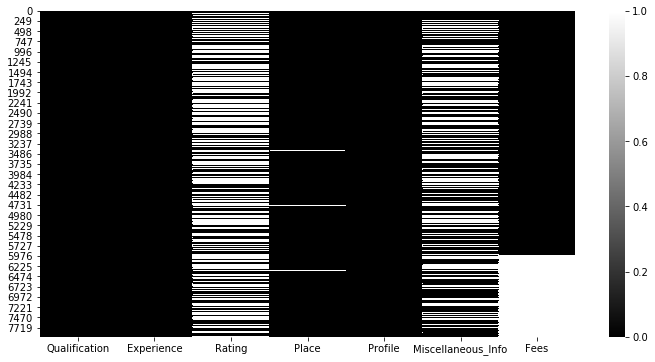

In [12]:
#Checking null values

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cmap='gray')

In [13]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
dtype: int64

In [14]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


### Exploratory Data Analysis

In [15]:
for i in df.columns:
    print(i)
    print('num of unique values -->',df[i].nunique())
    if df[i].nunique()<15:
        print(df[i].unique())
    else:
        print(df[i].describe())
    print('**********************************************************')

Qualification
num of unique values --> 1801
count     7948
unique    1801
top        BDS
freq       632
Name: Qualification, dtype: object
**********************************************************
Experience
num of unique values --> 64
count                   7948
unique                    64
top       9 years experience
freq                     419
Name: Experience, dtype: object
**********************************************************
Rating
num of unique values --> 52
count     3556
unique      52
top       100%
freq       907
Name: Rating, dtype: object
**********************************************************
Place
num of unique values --> 948
count                      7917
unique                      948
top       HSR Layout, Bangalore
freq                         97
Name: Place, dtype: object
**********************************************************
Profile
num of unique values --> 6
['Homeopath' 'Ayurveda' 'ENT Specialist' 'Dentist' 'General Medicine'
 'Dermatologists']
*

### Data Cleaning

In [16]:
#Experience

df['Experience'].value_counts()

9 years experience     419
10 years experience    404
8 years experience     380
11 years experience    374
12 years experience    358
                      ... 
61 years experience      1
64 years experience      1
66 years experience      1
58 years experience      1
60 years experience      1
Name: Experience, Length: 64, dtype: int64

In [17]:
df['Experience']=df['Experience'].str.split(' ').str[0].astype(int)
df['Experience'].unique()

array([24, 12,  9, 20,  8, 42, 10, 14, 23,  5,  7, 21, 19, 41, 31, 25, 16,
       15, 11, 22, 38,  6, 36, 13, 18, 46, 40, 49, 33,  0, 27, 30, 52, 60,
       26, 35, 34, 39, 32, 17, 28, 58,  4, 45, 44,  3, 37, 50, 29, 43, 54,
       66,  2, 51, 47, 48, 53, 56, 61, 59, 57, 55, 65, 64])

In [18]:
#Rating

df['Rating'].unique()

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%', '52%'],
      dtype=object)

In [19]:
df['Rating'].value_counts()

100%    907
98%     402
99%     327
97%     325
96%     285
95%     225
94%     166
93%     143
90%      95
92%      95
91%      86
88%      54
89%      53
85%      35
82%      32
83%      32
86%      27
80%      26
87%      25
84%      20
67%      17
77%      17
71%      16
81%      15
79%      15
73%      13
76%      13
60%      11
70%       8
75%       8
74%       7
78%       7
69%       6
55%       5
68%       5
56%       5
64%       4
72%       3
57%       3
63%       2
53%       2
65%       2
62%       2
33%       2
48%       1
58%       1
45%       1
40%       1
36%       1
52%       1
47%       1
7%        1
Name: Rating, dtype: int64

In [20]:
df['Rating']=df['Rating'].str.split('%').str[0].astype(float)
df['Rating'].mean()

94.59251968503936

In [21]:
a=int(df['Rating'].mean())
df['Rating'].fillna(a,inplace=True)
df['Rating']=df['Rating'].astype(int)

In [22]:
#Miscellaneous Info

df['Miscellaneous_Info'].unique()

array(['100% 16 Feedback Kakkanad, Ernakulam',
       '98% 76 Feedback Whitefield, Bangalore', nan, ...,
       'General Dentistry Dental Fillings RCT - Single Sitting',
       '98% 240 Feedback Velachery, Chennai',
       'RCT - Root Canal Treatment Root Canal Treatment - Rotary Pyorrhoea Treatment'],
      dtype=object)

In [23]:
df['Miscellaneous']=df['Miscellaneous_Info'].str.split('%',1).str[1].str.strip()
df['Miscellaneous'].unique()

array(['16 Feedback Kakkanad, Ernakulam',
       '76 Feedback Whitefield, Bangalore', nan, ...,
       '36 Feedback Moti Nagar, Hyderabad',
       '20 Feedback Miyapur, Hyderabad',
       '240 Feedback Velachery, Chennai'], dtype=object)

In [24]:
df['Feedback']=df['Miscellaneous'].str.extract('(\d+)')
df['Feedback'].unique()


array(['16', '76', nan, '4', '14', '8', '7', '46', '6', '60', '18', '2',
       '3', '21', '42', '65', '54', '43', '24', '44', '9', '47', '33',
       '51', '23', '30', '13', '84', '15', '55', '112', '20', '1', '5',
       '17', '67', '48', '11', '12', '40', '39', '57', '68', '175', '28',
       '34', '29', '19', '10', '506', '62', '38', '116', '53', '99',
       '566', '31', '72', '49', '50', '126', '22', '92', '59', '78',
       '493', '147', '101', '444', '1061', '282', '213', '82', '181',
       '187', '36', '71', '131', '159', '32', '141', '91', '153', '150',
       '88', '83', '26', '80', '27', '45', '35', '560', '188', '94', '64',
       '41', '37', '246', '109', '135', '52', '08', '118', '547', '203',
       '372', '435', '108', '56', '66', '102', '63', '210', '180', '61',
       '120', '128', '98', '854', '105', '96', '89', '25', '86', '74',
       '130', '148', '332', '97', '185', '154', '343', '192', '152', '87',
       '178', '309', '103', '243', '155', '238', '79', '388', 

In [25]:
for i in df[(df['Feedback'].isna())].index:
    df['Feedback'][i]=0

In [26]:
a=df['Feedback'].astype(float).mean()
df['Feedback'].fillna(a,inplace=True)
df['Feedback']=df['Feedback'].astype(int)

In [27]:
#Place

df['Place'].value_counts()

HSR Layout, Bangalore             97
Andheri West, Mumbai              97
Dwarka, Delhi                     93
Banjara Hills, Hyderabad          85
Mulund West, Mumbai               81
                                  ..
Sagar Road, Hyderabad              1
Ernakulam, Ernakulam               1
Sithalapakkam, Chennai             1
Edakochi, Ernakulam                1
Koramangala 7 Block, Bangalore     1
Name: Place, Length: 948, dtype: int64

In [28]:
df['Area']=df['Place'].str.split(', ').str[0].str.strip()
df['City']=df['Place'].str.split(', ').str[1].str.strip()

In [29]:
df['City'].value_counts()

Bangalore             1678
Mumbai                1608
Delhi                 1601
Hyderabad             1284
Chennai               1142
Coimbatore             298
Ernakulam              201
Thiruvananthapuram     103
Sector 5                 1
Name: City, dtype: int64

In [30]:
df['Area'].nunique()

937

In [31]:
df.drop(index=(df[df['Area'].isna()].index),axis=0,inplace=True)

In [32]:
#Profile

df['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [33]:
df['Profile'].value_counts()

Dentist             1838
General Medicine    1617
Dermatologists      1342
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64

In [34]:
#Qualification
df['Qualification'].value_counts()

BDS                                                                       632
BHMS                                                                      627
BAMS                                                                      624
MBBS                                                                      441
MBBS, MS - ENT                                                            280
                                                                         ... 
DNB - Dermatology, Venereology & Leprosy, MBBS, MD - Dermatology            1
B.Sc, MD - Homeopathy                                                       1
MBBS, MS - ENT, DNB - ENT, Diploma in Otorhinolaryngology (DLO), MAMS       1
BHMS, M.D. (Psychiatry), Fellowship in Child and Adolescent Psychiatry      1
BSc, DHMS, MD - Homeopathy, PhD - Homoeopathy                               1
Name: Qualification, Length: 1800, dtype: int64

In [35]:
df.columns


Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees', 'Miscellaneous', 'Feedback', 'Area',
       'City'],
      dtype='object')

In [36]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Miscellaneous,Feedback,Area,City
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,"16 Feedback Kakkanad, Ernakulam",16,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,"76 Feedback Whitefield, Bangalore",76,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,94,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,NaN,0,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,94,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,NaN,0,Bannerghatta Road,Bangalore
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,"4 Feedback Keelkattalai, Chennai",4,Keelkattalai,Chennai


In [37]:
df.drop(columns=['Miscellaneous_Info','Place','Miscellaneous'],axis=1,inplace=True)
df.shape

(7917, 8)

In [38]:
df

,Qualification,Experience,Rating,Profile,Fees,Feedback,Area,City
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100.0,16,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350.0,76,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,94,ENT Specialist,300.0,0,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,94,Ayurveda,250.0,0,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,250.0,4,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10,94,Ayurveda,NaN,0,Basavanagudi,Bangalore
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4,94,Dermatologists,NaN,0,Choolai,Chennai
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9,94,General Medicine,NaN,0,Porur,Chennai
7946,BDS,12,98,Dentist,NaN,0,Arekere,Bangalore


In [39]:
df.isnull().sum()

Qualification       0
Experience          0
Rating              0
Profile             0
Fees             1981
Feedback            0
Area                0
City                1
dtype: int64

In [40]:
df[df['City'].isna()]

,Qualification,Experience,Rating,Profile,Fees,Feedback,Area,City
3980,BDS,23,94,Dentist,250.0,0,e,NaN


In [41]:
df.drop(index=(df[df['City'].isna()].index),axis=0,inplace=True)

In [42]:
df.isnull().sum()

Qualification       0
Experience          0
Rating              0
Profile             0
Fees             1981
Feedback            0
Area                0
City                0
dtype: int64

In [43]:
#Separate the categorical and numerical data

cat_df,num_df=[],[]
for i in df:
    if df[i].dtypes=='O':
        cat_df.append(i)
    elif(df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
print('Total number of features:',df.shape[1])
print('Number of categorical features:',len(cat_df))
print('Number of numerical features:',len(num_df))

Total number of features: 8
Number of categorical features: 4
Number of numerical features: 4


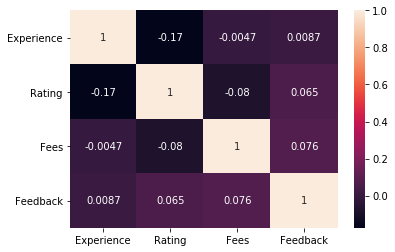

In [44]:
sns.heatmap(df.corr(),annot=True)

Finding:Fees is positively correlated with Feedback.

Skewness of Experience=0.99
Skewness of Rating=-4.43
Skewness of Fees=0.75
Skewness of Feedback=16.98


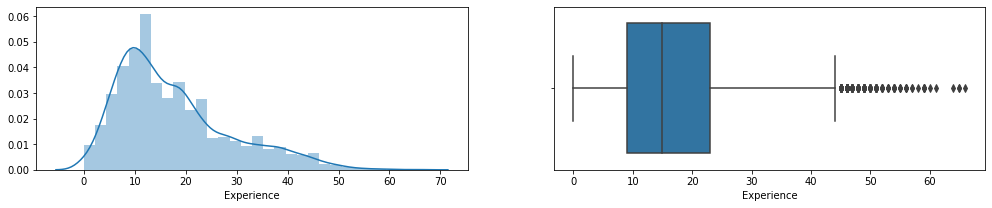

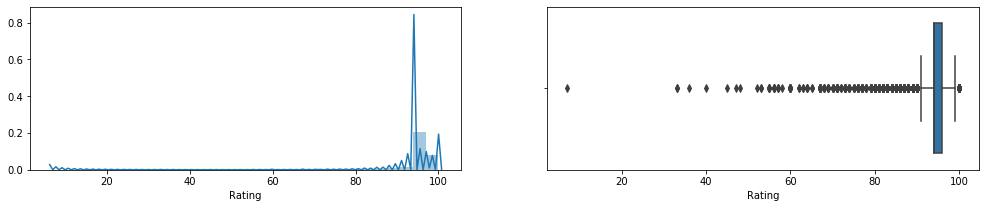

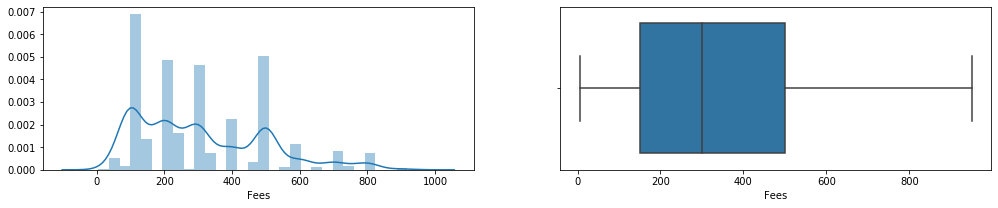

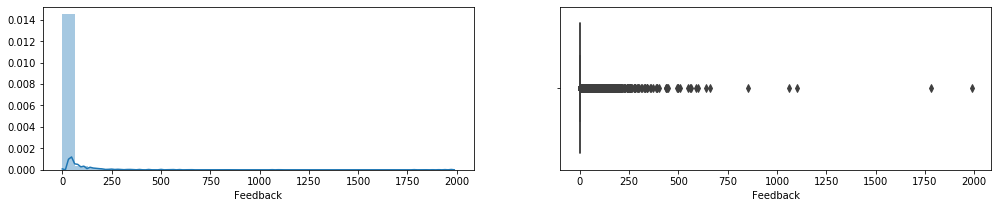

In [45]:
#Univariate analysis

for i in num_df:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s=%0.2f' %(i,df[i].skew()))

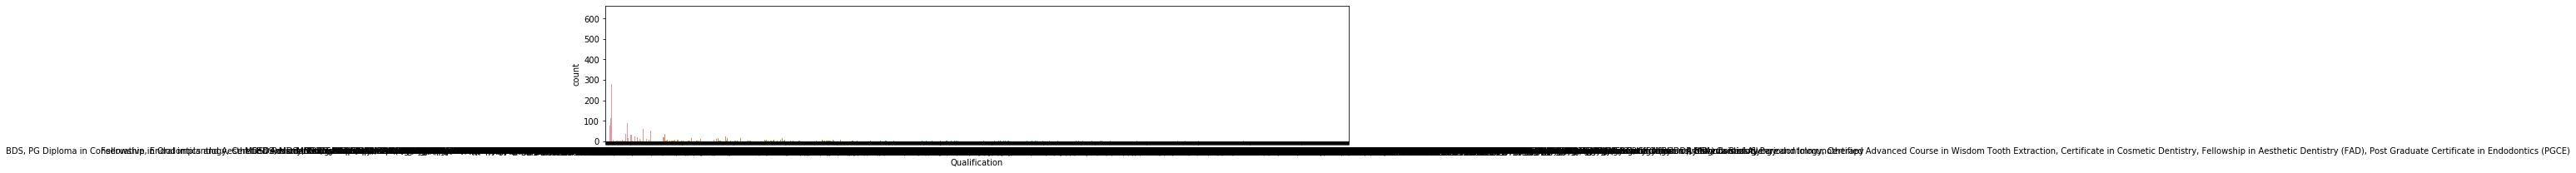

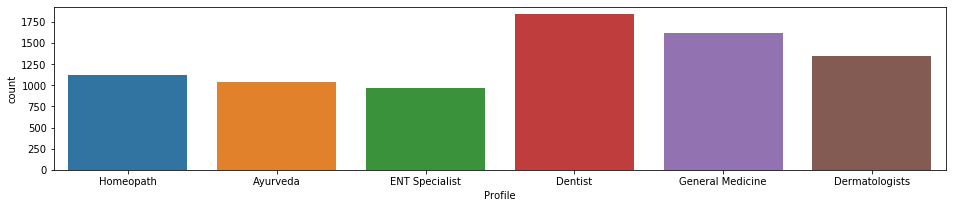

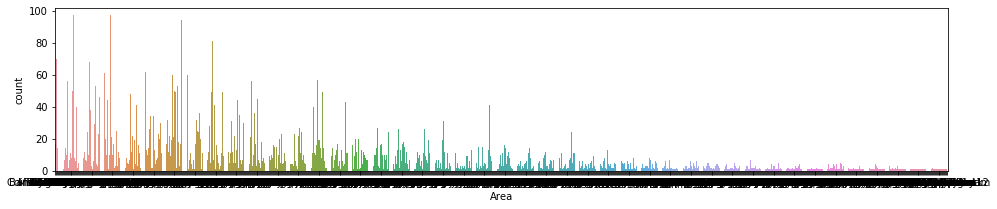

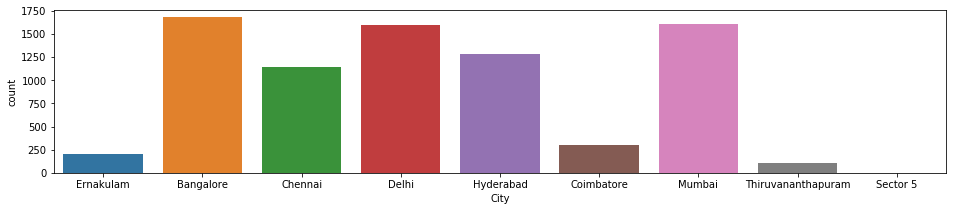

In [46]:
for i in cat_df:
    f=plt.figure(figsize=(16,3))
    f.add_subplot(1,1,1)
    sns.countplot(df[i])

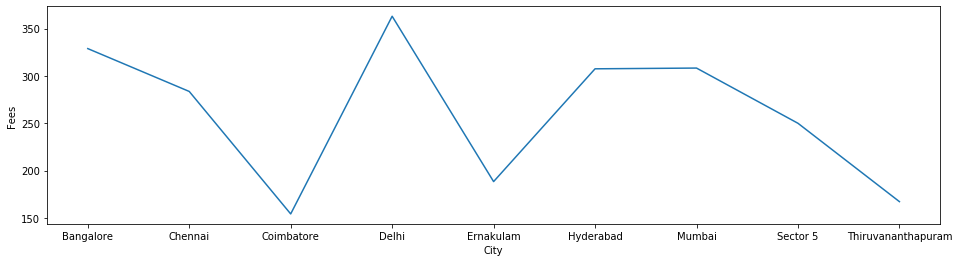

In [47]:
#Bivariate analysis

plt.figure(figsize=(16,4))
sns.lineplot(x='City',y='Fees',data=df,ci=None)

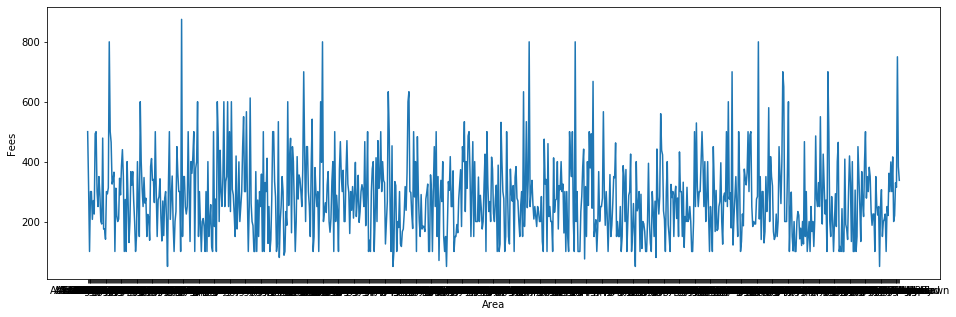

In [48]:
plt.figure(figsize=(16,5))
sns.lineplot(x='Area',y='Fees',data=df,ci=None)

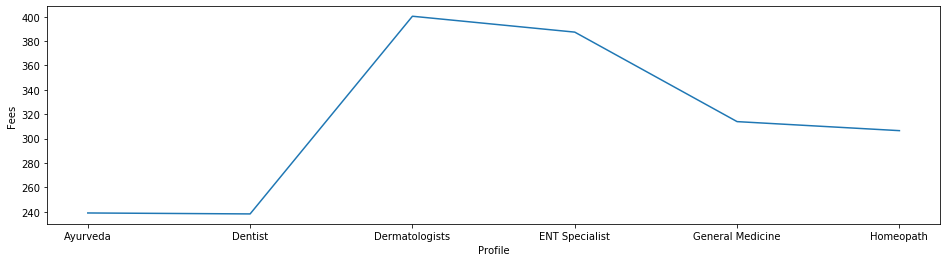

In [49]:
plt.figure(figsize=(16,4))
sns.lineplot(x='Profile',y='Fees',data=df,ci=None)

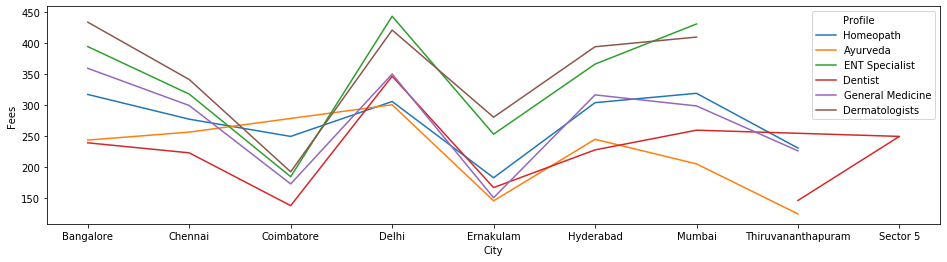

In [50]:
plt.figure(figsize=(16,4))
sns.lineplot(x='City',y='Fees',hue="Profile",data=df,ci=None)

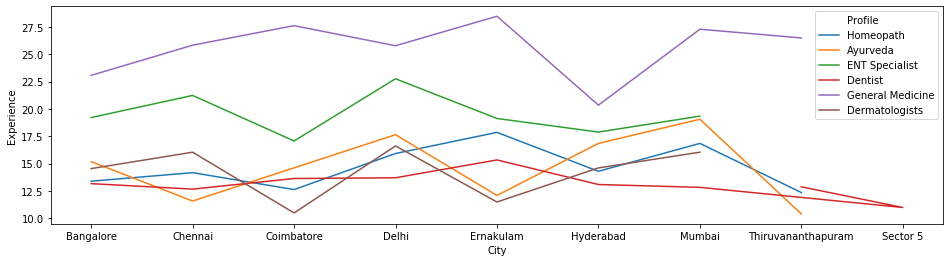

In [51]:
plt.figure(figsize=(16,4))
sns.lineplot(x='City',y='Experience',hue='Profile',data=df,ci=None)

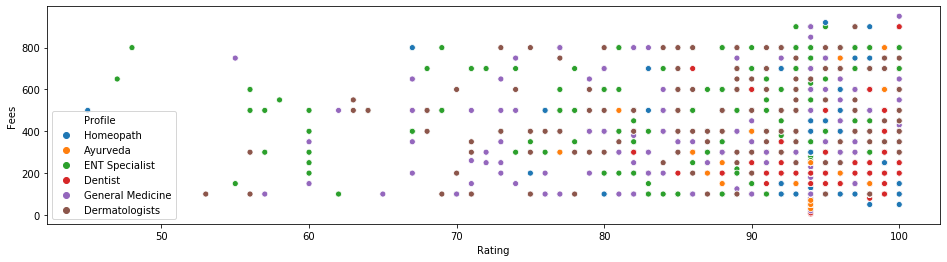

In [52]:
df1=df[df['Rating']>40]
plt.figure(figsize=(16,4))
sns.scatterplot(x='Rating',y='Fees',hue='Profile',data=df1,ci=None)

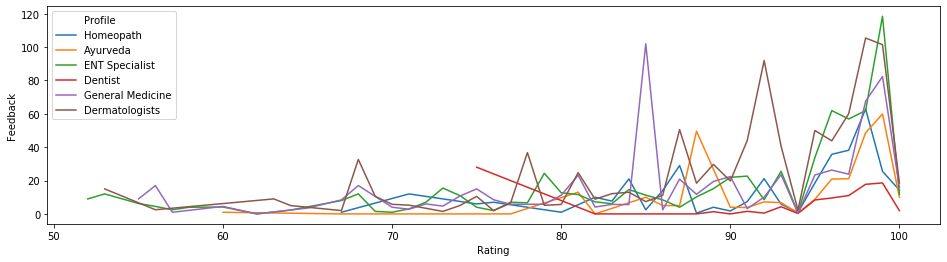

In [53]:
df1=df[df['Rating']>50]
plt.figure(figsize=(16,4))
sns.lineplot(x='Rating',y='Feedback',hue='Profile',data=df1,ci=None)

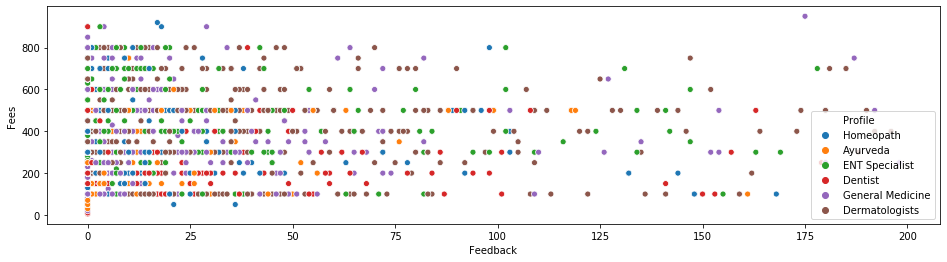

In [54]:
df1=df[df['Feedback']<200]
plt.figure(figsize=(16,4))
sns.scatterplot(x='Feedback',y='Fees',hue='Profile',data=df1,ci=None)

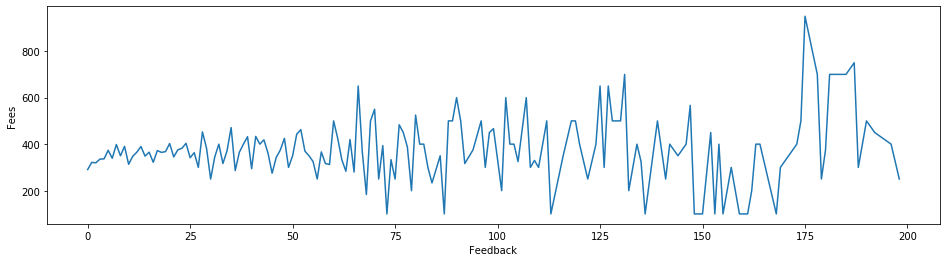

In [55]:
df1=df[df['Feedback']<200]
plt.figure(figsize=(16,4))
sns.lineplot(x='Feedback',y='Fees',data=df1,ci=None)

In [56]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,Feedback,Area,City
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100.0,16,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350.0,76,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,94,ENT Specialist,300.0,0,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,94,Ayurveda,250.0,0,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,250.0,4,Keelkattalai,Chennai


In [57]:
#converting categorical values into numerical values

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=['Qualification','Profile','Area','City']
for i in col:
    df[i]=le.fit_transform(df[i])

In [58]:
df[df['Fees'].isna()].shape

(1981, 8)

In [59]:
df.shape[0]

7916

In [60]:
df.index=range(0,7916)
df[df['Fees'].isna()].head()

,Qualification,Experience,Rating,Profile,Fees,Feedback,Area,City
5935,748,35,94,4,NaN,0,217,6
5936,982,31,94,3,NaN,0,923,5
5937,788,40,70,2,NaN,4,314,1
5938,16,0,94,0,NaN,0,573,3
5939,255,16,100,1,NaN,0,340,0


In [61]:
#splitting x and y variables

df_train=df[0:5935]
df_test=df[5935:].drop(columns=['Fees'],axis=1)
x=df_train.drop(columns=['Fees'],axis=1)
y=df_train['Fees']

In [62]:
#Scaling the data
ss=StandardScaler()
x=ss.fit_transform(x)

## Machine Learning Algorithm

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train.shape:',x_train.shape,'x_test.shape:',x_test.shape)
print('y_train.shape:',y_train.shape,'y_test.shape:',y_test.shape)

x_train.shape: (4748, 7) x_test.shape: (1187, 7)
y_train.shape: (4748,) y_test.shape: (1187,)


In [64]:
from sklearn.metrics import mean_squared_error,r2_score
def models(model,x_train,x_test,y_train,y_test,score,rmse):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score.append(model.score(x_train,y_train))
    rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))
    
    print('Score:',model.score(x_train,y_train))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('r2 Score:',r2_score(y_test,y_pred))

In [65]:
model_name,score,rmse=[],[],[]

In [66]:
#Linear Regression

from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
mod='LinearRegression'
print('Model Report for',mod)
models(lreg,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model Report for LinearRegression
Score: 0.08881443668001832
RMSE: 185.62298069694225
r2 Score: 0.06033273348110235


In [67]:
#Ridge Regression

from sklearn.linear_model import Ridge
parameters={'alpha':[0.001,0.01,0.1,1]}
best=GridSearchCV(Ridge(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'alpha': 1}

In [68]:
rr=Ridge(alpha=1)
mod='RidgeRegression'
print('Model Report for:',mod)
models(rr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model Report for: RidgeRegression
Score: 0.08881443326094096
RMSE: 185.6222960095917
r2 Score: 0.060339665565719236


In [69]:
#Lasso Regression

from sklearn.linear_model import Lasso
parameters={'alpha':[0.001,0.01,0.1,1]}
best=GridSearchCV(Lasso(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'alpha': 0.001}

In [70]:
lr=Lasso(alpha=0.001)
mod='Lasso Regression'
print('Model Report for:',mod)
models(lr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model Report for: Lasso Regression
Score: 0.0888144364767336
RMSE: 185.62281800657567
r2 Score: 0.06033438063432117


In [71]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.001)
mod='Elastic Net'
print('Model Report for:',mod)
models(enr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model Report for: Elastic Net
Score: 0.0888144160122829
RMSE: 185.62127668379154
r2 Score: 0.06034998563408389


In [72]:
#Support Vector Regression
from sklearn.svm import SVR
parameters={'kernel':['linear','poly','rbf']}
best=GridSearchCV(SVR(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'kernel': 'linear'}

In [73]:
svr=SVR(kernel='linear')
mod='Support Vector Regression' 
print('Model Report for:',mod)
models(svr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model Report for: Support Vector Regression
Score: 0.05406666178664853
RMSE: 189.75425293082387
r2 Score: 0.018040330905671587


In [74]:
#Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
parameters={'max_depth':[8,10,12,15],'min_samples_leaf':[100,150]}
best=GridSearchCV(DecisionTreeRegressor(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'max_depth': 8, 'min_samples_leaf': 100}

In [75]:
dct=DecisionTreeRegressor(max_depth=8,min_samples_leaf=100)
mod='Decision Tree Regressor'
print('Model Report for:',mod)
models(dct,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model Report for: Decision Tree Regressor
Score: 0.19706911453371556
RMSE: 177.30724946581995
r2 Score: 0.1426392464095081


In [76]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
parameters={'n_estimators':[50,100,150],'max_depth':[5,6]}
best=GridSearchCV(RandomForestRegressor(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'max_depth': 6, 'n_estimators': 100}

In [77]:
rf=RandomForestRegressor(n_estimators=100,max_depth=6)
mod='Random Forest Regressor'
print('Model Report for:',mod)
models(rf,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model Report for: Random Forest Regressor
Score: 0.2614682599222308
RMSE: 174.2439351930953
r2 Score: 0.17200835291028416


In [78]:
gbr=GradientBoostingRegressor(n_estimators=250)
mod='Gradient Boosting Regression'
print('Model Report for:',mod)
models(gbr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model Report for: Gradient Boosting Regression
Score: 0.36142838541040145
RMSE: 169.91798568779228
r2 Score: 0.21261104940665176


In [79]:
abr=AdaBoostRegressor(n_estimators=250)
mod='AdaBoost Regression'
print('Model Report for:',mod)
models(abr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model Report for: AdaBoost Regression
Score: 0.115839775061225
RMSE: 182.277865965357
r2 Score: 0.09389508789449441


In [80]:
final=pd.DataFrame({'Model name':model_name,'Score':score,'RMSE':rmse})
final

,Model name,Score,RMSE
0,LinearRegression,0.088814,185.622981
1,RidgeRegression,0.088814,185.622296
2,Lasso Regression,0.088814,185.622818
3,Elastic Net,0.088814,185.621277
4,Support Vector Regression,0.054067,189.754253
5,Decision Tree Regressor,0.197069,177.307249
6,Random Forest Regressor,0.261468,174.243935
7,Gradient Boosting Regression,0.361428,169.917986
8,AdaBoost Regression,0.115840,182.277866


Remark:
    Accuracy score is very less by using grid search parameters.
    so creating a function for all models using default parameters.

In [81]:
def models(model,x_train,x_test,y_train,y_test,score,rmse):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score.append(model.score(x_train,y_train)*100)
    rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))
    
    print('Accuracy score:,%0.2f' %(model.score(x_train,y_train)*100))
    print('r2 score:',r2_score(y_test,y_pred))
    print('Mean Absolute error:',mean_absolute_error(y_test,y_pred))
    print('Mean Squared error:',mean_squared_error(y_test,y_pred))
    print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
    


In [82]:
lreg=LinearRegression()
knr=KNeighborsRegressor()
rr=Ridge()
lr=Lasso()
enr=ElasticNet()
svr=SVR()
dct=DecisionTreeRegressor()
rf=RandomForestRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()

In [83]:
all_models={'LinearRegression':lreg,
             'KNeighborsRegressor':knr,
             'Ridge':rr,
             'Lasso':lr,
             'ElasticNet':enr,
             'SVR':svr,
             'DecisionTreeRegressor':dct,
             'RandomForestRegressor':rf,
             'GradientBoostingRegressor':gbr,
             'AdaBoostRegressor':abr
           }

In [84]:
score,rmse=[],[]
for i,j in all_models.items():
    print('**************************',i,'************************')
    models(j,x_train,x_test,y_train,y_test,score,rmse)

************************** LinearRegression ************************
Accuracy score:,8.88
r2 score: 0.06033273348110235
Mean Absolute error: 151.19476316470676
Mean Squared error: 34455.89096281739
Root Mean Squared error: 185.62298069694225
************************** KNeighborsRegressor ************************
Accuracy score:,36.21
r2 score: 0.024379425447538683
Mean Absolute error: 145.30126368997472
Mean Squared error: 35774.23342881213
Root Mean Squared error: 189.14077674793484
************************** Ridge ************************
Accuracy score:,8.88
r2 score: 0.060339665565719236
Mean Absolute error: 151.19531390406655
Mean Squared error: 34455.63677587249
Root Mean Squared error: 185.6222960095917
************************** Lasso ************************
Accuracy score:,8.86
r2 score: 0.06171822808251637
Mean Absolute error: 151.29578021685836
Mean Squared error: 34405.087393706446
Root Mean Squared error: 185.48608409718085
************************** ElasticNet **********

In [85]:
pd.DataFrame([all_models.keys(),score,rmse],index=['Model','Accuracy score','RMSE']).T.sort_values(by='Accuracy score',
                                                                                 ascending=False)

,Model,Accuracy score,RMSE
6,DecisionTreeRegressor,99.8218,235.573
7,RandomForestRegressor,88.401,173.185
1,KNeighborsRegressor,36.2051,189.141
8,GradientBoostingRegressor,27.7377,171.018
9,AdaBoostRegressor,12.4724,181.169
0,LinearRegression,8.88144,185.623
2,Ridge,8.88144,185.622
3,Lasso,8.86093,185.486
4,ElasticNet,7.9776,185.456
5,SVR,5.00008,189.164


observation: Decision Tree Regressor gives highest accuracy score of 99%.

In [86]:
cv_scores=cross_val_score(dct,x_train,y_train,cv=10)
cv_scores.mean()*100

-53.969363358479725

In [87]:
cv_scores=cross_val_score(rf,x_train,y_train,cv=10)
cv_scores.mean()*100


17.37524895536712

In [88]:
#saving the model

import joblib
from joblib import dump
joblib.dump(dct,'dtr_doctor_consultation_fee.pkl')

['dtr_doctor_consultation_fee.pkl']